In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
#suffling the data
train_shuffled = shuffle(train.values,random_state=0)
# Extracting features as X and labels as y
X_train = train.drop(labels = ["label"],axis = 1) 
y_train = train["label"]

X_test = test.values

print(f'X_train = {X_train.shape}, y = {y_train.shape}, X_test = {X_test.shape}')

X_train = (42000, 784), y = (42000,), X_test = (28000, 784)


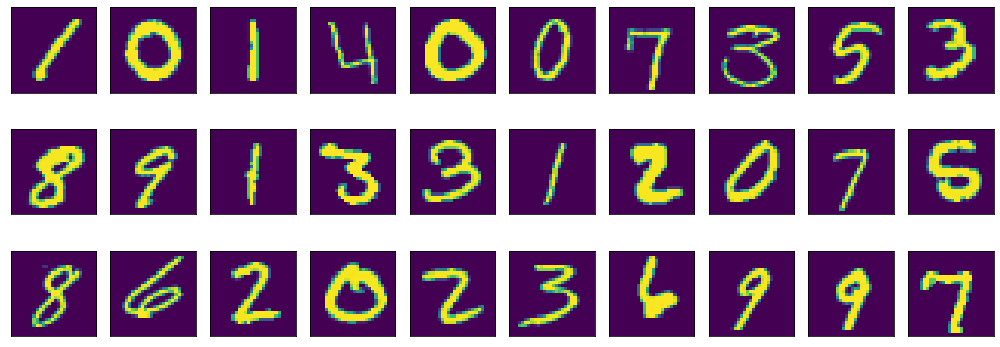

In [7]:
plt.figure(figsize=(14,12))


for digit_num in range(0,30):
  plt.subplot(7,10,digit_num+1)
  grid_data = X_train.iloc[digit_num].values.reshape(28,28)
  plt.imshow(grid_data, interpolation = "none")
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()

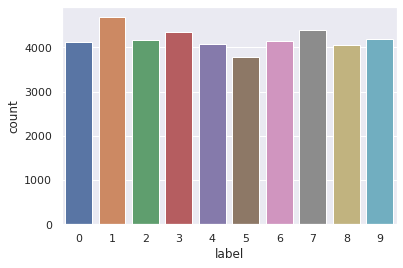

In [8]:
# Exploring the class distribution (almost equally distributed)

sns.set(style="darkgrid")
counts = sns.countplot(x="label", data=train)


In [9]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_train)
normalized_X_train = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

In [ ]:
%%time

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 2, 10)
gamma_range = np.logspace(-2, 2, 10)
param_grid = dict(gamma=gamma_range, C=C_range)

# print(param_grid)

param_grid["kernel"] = ["rbf"]
# print(param_grid)

cv = StratifiedShuffleSplit(test_size=0.2, random_state=42)
# print(cv)

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(normalized_X_train, y_train)


print("The best parameters are %s with a score of %0.2f"
       % (grid.best_params_, grid.best_score_))

In [ ]:
pca = PCA(n_components=0.90)
pca_X_train = pca.fit_transform(normalized_X_train)
pca_X_test = pca.transform(normalized_X_test)
print(f'{pca.explained_variance_} \n Number of PCA Vectors = {len(pca.explained_variance_)}' )

In [ ]:
cl = svm.SVC(gamma=0.00728932024638, C=2.82842712475)
cl.fit(pca_X_train,y_train)

train_accuracy = cl.score(pca_X_train,y_train)

print(f"Training Accuracy: {train_accuracy*100}")

pred_y = cl.predict(pca_X_test)

In [ ]:
image = [i+1 for i in range(len(pred_y))]
sub = pd.DataFrame({'ImageId':image,'Label':(pred_y)})
filename = 'Digit Recognizer - SVM.csv'
sub.to_csv(filename,index=False)
print('Saved file: ' + filename)
submission.head()
